<a href="https://colab.research.google.com/github/rajwa-salem/Rajwa2/blob/main/Final_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I

**Calories Burnt Prediction using Machine Learning**

```
By RAJWA ALSINANI
```



# Table of Contents
1.[Data Cleaning ](#1.-Data-Cleaning)
    
2.[Data Processing](#2.-Data-Processing)

3.[Data Analysis  ](#3.-Data-Analysis)

4.[Data Visualization ](#4.-Data-Visualization)

5.[Model implementation](#6.-Model-implementation)

6.[ Model Evaluation ](#7-Model-Evaluation)

**Objective:**

 The goal of this project is to develop a machine learning model that predicts the number of calories burned during physical activities. The model will utilize user-specific information and activity-related features to provide accurate calorie predictions. Predicting the calories burned can aid individuals in optimizing their workout routines and achieving their fitness goals.


# **Data Cleaning**

##**1- Importing the required libraries**

---













In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **2- Loading the Dataset**



https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

In [ ]:
# Loading the Calories file
from google.colab import files
uploaded = files.upload()
calories = pd.read_csv('/content/calories.csv')

Saving calories.csv to calories (2).csv


In [ ]:
#print first 5 rows
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
# Loading the Exercise file
from google.colab import files
uploaded = files.upload()
exercise_data = pd.read_csv('/content/exercise.csv')

Saving exercise.csv to exercise (2).csv


In [ ]:
# print first 5 rows
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


##**3- Combining the two Dataframes**


In [ ]:
#Combining calories with exercise
combined_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [ ]:
# print first 5 rows
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
combined_data.drop(columns=['User_ID','Gender'])

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0


In [ ]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in combined_data.columns if combined_data[feature].dtype != 'O']
categorical_features = [feature for feature in combined_data.columns if combined_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

We have 1 categorical features : ['Gender']


In [ ]:
#checking the number of row and columns
combined_data.shape

(15000, 9)

In [ ]:
#The column
combined_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
#Check data types before Processing
combined_data.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [ ]:
#getting some information about the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

No missing valuse

In [ ]:
#Check for duplicate rows
combined_data.duplicated().sum()

0

In [ ]:
# Check for inconsistencies
print(combined_data.value_counts())

User_ID   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
10001159  female  67   176.0   74.0    12.0      103.0       39.6       76.0        1
16616055  male    77   193.0   97.0    13.0      87.0        39.9       75.0        1
16611029  male    30   167.0   70.0    27.0      107.0       40.9       160.0       1
16611557  male    57   186.0   90.0    3.0       82.0        38.1       12.0        1
16612651  male    26   185.0   85.0    7.0       86.0        39.5       20.0        1
                                                                                   ..
13326376  female  61   164.0   62.0    13.0      95.0        40.1       72.0        1
13327254  male    58   179.0   82.0    23.0      107.0       40.4       173.0       1
13327512  male    36   196.0   103.0   10.0      99.0        39.7       57.0        1
13327895  male    43   178.0   77.0    27.0      107.0       40.9       181.0       1
19999647  male    29   164.0   67.0    30.0      102.0     

# **Data Processing**

##**Standardizing**






In [ ]:
combined_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
combined_data.describe().round(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000,15000.00,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000
mean,1.497736e+07,0.504,42.79,174.465,74.967,15.531,95.519,40.025,89.540
std,2.872851e+06,0.500,16.98,14.258,15.036,8.319,9.583,0.779,62.457
min,1.000116e+07,0.000,20.00,123.000,36.000,1.000,67.000,37.100,1.000
25%,1.247419e+07,0.000,28.00,164.000,63.000,8.000,88.000,39.600,35.000
50%,1.499728e+07,1.000,39.00,175.000,74.000,16.000,96.000,40.200,79.000
75%,1.744928e+07,1.000,56.00,185.000,87.000,23.000,103.000,40.600,138.000
max,1.999965e+07,1.000,79.00,222.000,132.000,30.000,128.000,41.500,314.000


In [ ]:
X1=combined_data.iloc[:,0:7]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalerStandard = StandardScaler()

In [ ]:
X1 = scalerStandard.fit_transform(X1)

In [ ]:
X1=pd.DataFrame(X1, columns=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories'])

In [ ]:
X1.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,-0.084934,-1.007092,1.484726,1.089582,1.265909,1.619127,0.989404
1,-0.040261,0.992958,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461
2,-1.321900,-1.007092,1.543620,0.318066,0.268247,-1.265861,-0.784569
3,0.418779,0.992958,-0.517665,0.318066,-0.263839,-0.304198,0.467647
4,0.972783,0.992958,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029


In [ ]:
X1.describe().round(3)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000
mean,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.732,-1.007,-1.342,-3.610,-2.592,-1.747,-2.976
25%,-0.871,-1.007,-0.871,-0.734,-0.796,-0.905,-0.785
50%,0.007,0.993,-0.223,0.038,-0.064,0.056,0.050
75%,0.860,0.993,0.778,0.739,0.800,0.898,0.781
max,1.748,0.993,2.133,3.334,3.793,1.739,3.389


# **Data Analysis**

In [ ]:
# get statistics
combined_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# **Data Visualization**


##Plotting countplot & distplot

In [ ]:
sns.set()

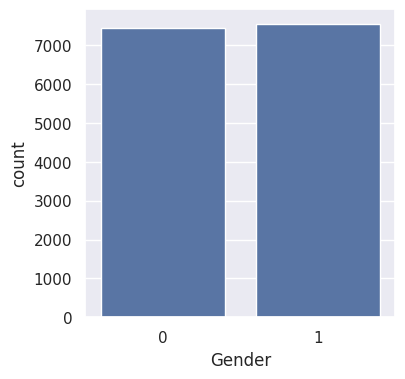

In [ ]:
# Plotting gender column
plt.figure(figsize=(4,4))
sns.countplot(x= 'Gender', data= combined_data)
plt.show()

<ipython-input-29-d9b9149885d3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

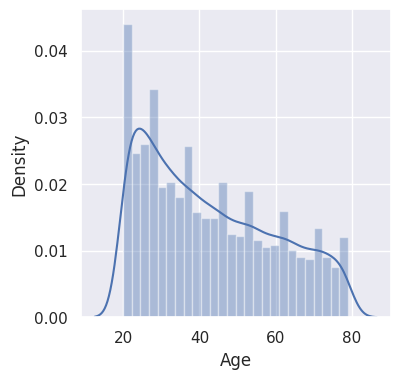

In [ ]:
#find the distribution of age column
plt.figure(figsize=(4,4))
sns.distplot(combined_data['Age'])

From the above plot, we can observe that the Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.

<ipython-input-30-1b770ceb4a15>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

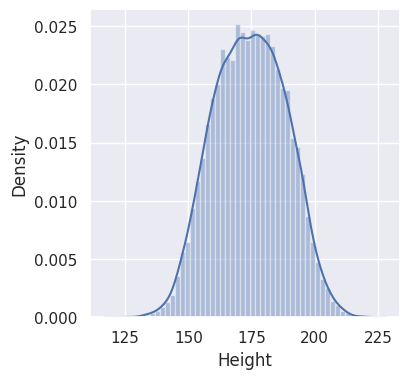

In [ ]:
# Distribution by 'Height'
plt.figure(figsize=(4,4))
sns.distplot(combined_data['Height'])

<ipython-input-31-75e5eae23b7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

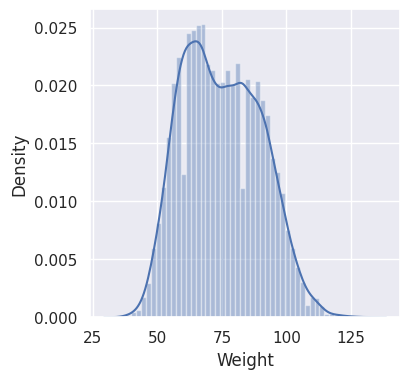

In [ ]:
 # Distribution by 'Weight'
plt.figure(figsize=(4,4))
sns.distplot(combined_data['Weight'])

<ipython-input-32-e972365e083c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

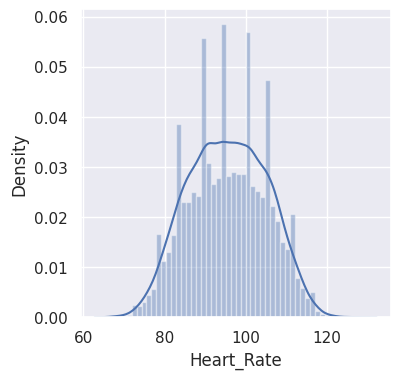

In [ ]:
 # Distribution by 'Heart_Rate'
plt.figure(figsize=(4,4))
sns.distplot(combined_data['Heart_Rate'])

<ipython-input-33-4e3194e05e23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

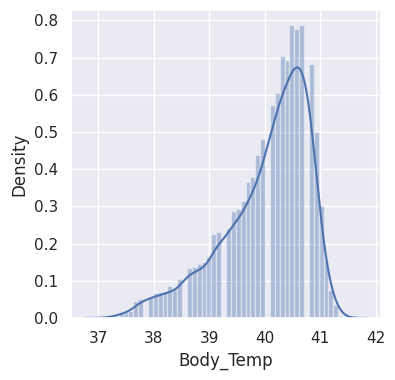

In [ ]:
 # Distribution by 'Body_Temp'
plt.figure(figsize=(4,4))
sns.distplot(combined_data['Body_Temp'])

##Plotting Scatterplot

<ipython-input-34-a9c0bc14894f>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i+1)


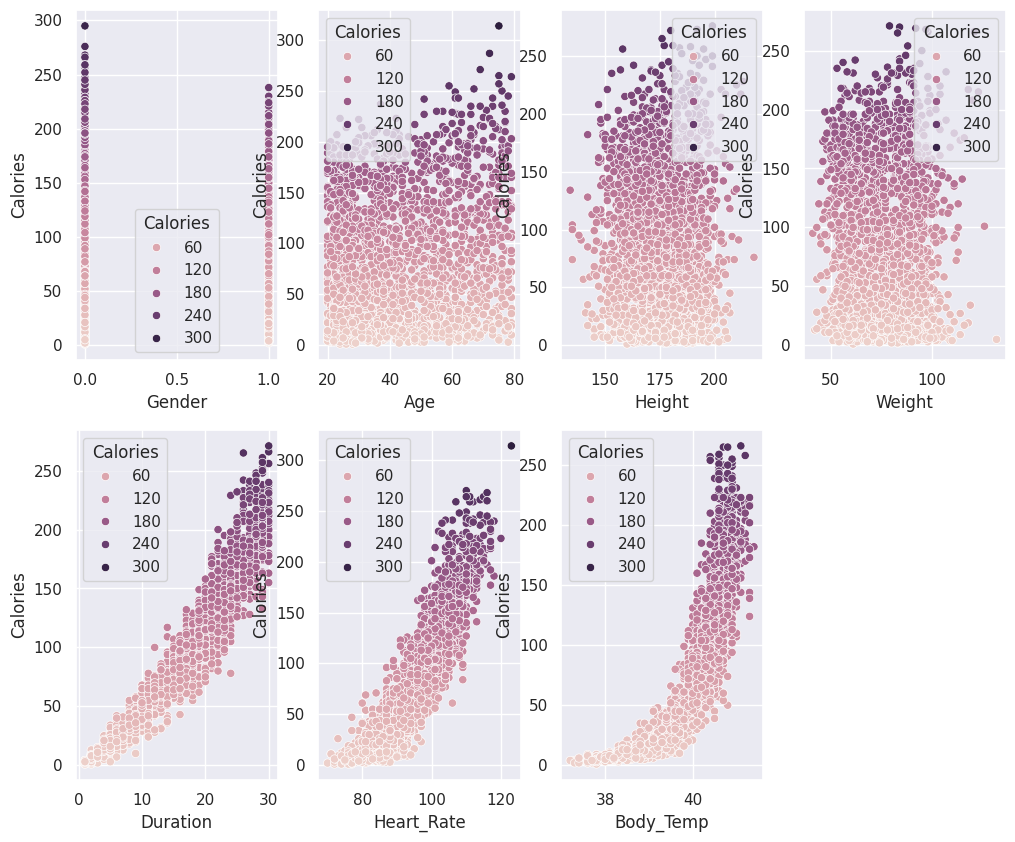

In [ ]:
y_axis = combined_data.iloc[:,1:-1]
plt.subplots(figsize=(12,10))

for i,col in enumerate(y_axis):
  plt.subplot(2,4,i+1)
  x = combined_data.sample(2000)
  sns.scatterplot(x=x[col], y=x['Calories'],hue=combined_data['Calories'])

plt.show()

##**Correlation Matrix**


<Axes: >

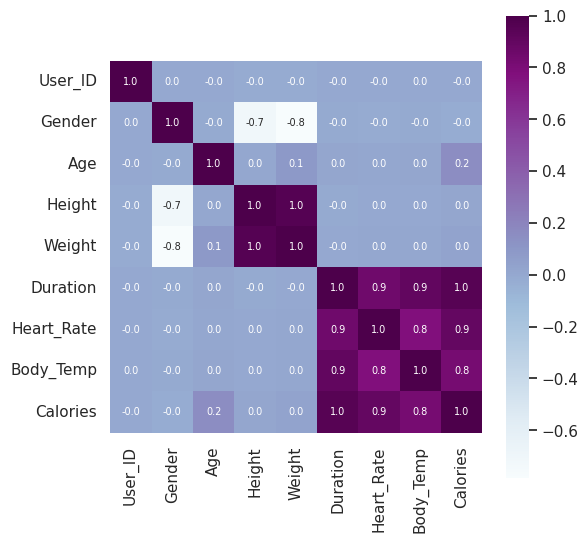

In [ ]:
# Correlation through Heatmap
correlation = combined_data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':7}, cmap='BuPu')



Duration & calories are directly proportional=positively correlated

Age, Height and Weight are not much correlated with Calories.


Body_Temp, Heart_Rate and Duration are highly correlated with calories


## **Separatin of features and target**

In [ ]:
# Separating features and target
X = combined_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = combined_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
# Confirm dimensions
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(15000, 7) (12000, 7) (3000, 7)
(15000,) (12000,) (3000,)


Hence, we can observe that

*X contains the orignal amount of data which is 15000*

*X_train contains 80% of the data which is 12000*

*X_test contains 20% of the data which is 300*

# **Model implementation**

> **XG Boost Regression Model**



In [ ]:
# loading the model
model = XGBRegressor()


In [ ]:
# training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Model Evaluation**


In [ ]:
# Prediction on test data
Y_pred = model.predict(X_test)


In [ ]:
print(Y_pred)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [ ]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  1.4833678883314132


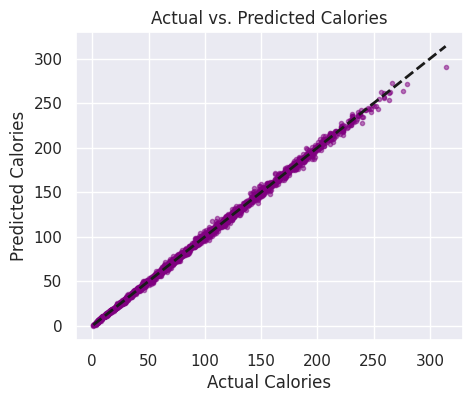

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, Y_pred, color='Purple', alpha=0.5, marker='.')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs. Predicted Calories')
plt.show()


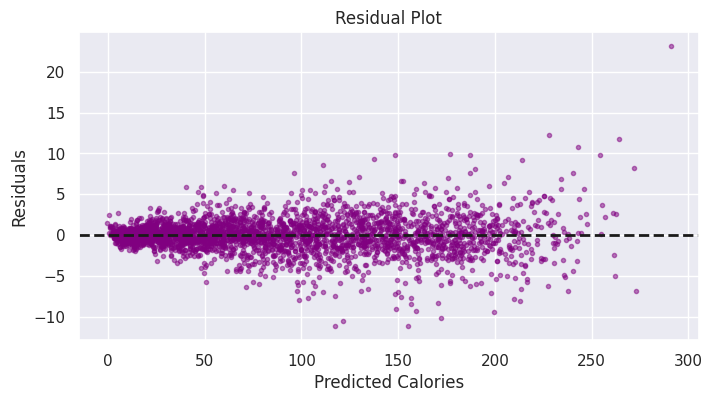

In [ ]:
# Residual plot
plt.figure(figsize=(8, 4))
plt.scatter(Y_pred, Y_test - Y_pred, color='purple', alpha=0.5, marker='.')
plt.xlabel('Predicted Calories')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.show()

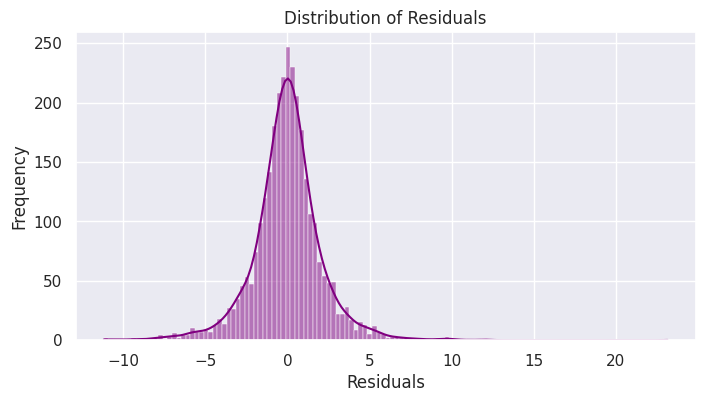

In [ ]:
# Distribution of residuals
plt.figure(figsize=(8, 4))
sns.histplot(Y_test - Y_pred, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
input_data = (1,30,166.0,60.0,30.0,94.0,40.3)
data_to_nparray = np.array(input_data)
reshape_data = data_to_nparray.reshape(1,-1)
predict = model.predict(reshape_data)

print("C brunt :", predict)

C brunt : [147.95541]


# Part II

## Q1

 Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# Using a for loop
print("Even numbers (using for loop):")
for num in range(1, 11):
    if num % 2 == 0:
        print(num)

# Using a while loop
print("\nEven numbers (using while loop):")
num = 1
while num <= 10:
    if num % 2 == 0:
        print(num)
    num += 1

Even numbers (using for loop):
2
4
6
8
10

Even numbers (using while loop):
2
4
6
8
10


## Q2

Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
def grade_classifier(score):
  if score >= 90:
        return "A"
  elif 80 <= score < 90 :
        return "B"
  elif 70 <= score < 80:
        return "C"
  elif 60 <= score < 70:
        return "D"
  else:
        return "F"
# Example usage:
score = 90
grade = grade_classifier(score)
print("Grade:", grade)

Grade: A


## Q3

If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
# prompts the user to enter their age
user_age = int(input("please enter your age : "))

if user_age < 13:
     print ("Child")
elif 13 <= user_age <= 19:
     print ("Teenager")
elif 20 <= user_age <= 59 :
     print ("Adult")
else:
     print("Senior Citizen")

please enter your age : 32
Adult


## Q4

Functions
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.

In [ ]:
def multiply_numbers(num1,num2):
   product = num1 * num2
   return product

# Test the function with values 5 and 7
result = multiply_numbers(5,7)
print("Result:", result)

Result: 35


## Q5

Write a Python program that does the following:

Prompts the user to enter a number (user_num). Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.

In [ ]:
# prompt the user enter a number
user_num = int(input("please enter a number:"))

# Print numbers divisible by 3
print("numbers divisible by 3:")
for num in range(1, user_num +1):
  if num % 3 == 0:
    print(num)


please enter a number:9
numbers divisible by 3:
3
6
9
